<div align='center' ><img src='https://raw.githubusercontent.com/davidrpugh/numerical-methods/master/images/sgpe-logo.jpg' width="1200" height="100"></div>
<div align='right'><img src='https://raw.githubusercontent.com/davidrpugh/numerical-methods/master/images/SIRElogolweb.jpg' width="1200" height="100"></div>

In [13]:
import numpy as np
import sympy as sym
import solowpy
sym.init_printing() 

# 1 Creating an instance of the `solow.Model` class

In this notebook I will walk you through the creation of an instance of the `solow.Model` class. To create an instance of the `solow.Model` we must define two primitives: an aggregate production function and a dictionary of model parameter values.

## 1.1 Defining the production function $F$:

At each point in time the economy in a Solow growth model has some amounts of capital, $K$, labor, $L$, and knowledge (or technology), $A$, that can be combined to produce output, $Y$, according to some function, $F$:

$$ Y(t) = F(K(t), A(t)L(t)) \tag{1.1.1} $$

where $t$ denotes time. Note that $A$ and $L$ are assumed to enter multiplicatively. Typically $A(t)L(t)$ denotes "effective labor", and technology that enters in this fashion is known as labor-augmenting or "Harrod neutral."

A key assumption of the model is that the function $F$ exhibits constant returns to scale in capital and labor inputs. Specifically,

$$ F(cK(t), cA(t)L(t)) = cF(K(t), A(t)L(t)) = cY(t) \tag {1.1.2} $$

for any $c \ge 0$. For reference, the above information is contained in the docstring of the `solow.Model.output` attribute.

In [2]:
solow.Model.output?

### Examples:
A common functional form for aggregate production in a Solow model that satisies the above assumptions is the [Cobb-Douglas](http://en.wikipedia.org/wiki/Cobb%E2%80%93Douglas_production_function) production function

\begin{equation}
  \lim_{\rho \rightarrow 0} Y(t) = K(t)^{\alpha}(A(t)L(t))^{1-\alpha}. \tag{1.1.3}
\end{equation}

The Cobb-Douglas production function is actually a special case of a more general class of production functions called [constant elasticity of substitution (CES)](http://en.wikipedia.org/wiki/Constant_elasticity_of_substitution) production functions.

\begin{equation}
  Y(t) = \bigg[\alpha K(t)^{\rho} + (1-\alpha) (A(t)L(t))^{\rho}\bigg]^{\frac{1}{\rho}} \tag{1.1.4}
\end{equation}

where $0 < \alpha < 1$ and $-\infty < \rho < 1$. The parameter $\rho = \frac{\sigma - 1}{\sigma}$ where $\sigma$ is the elasticity of substitution between factors of production. Taking the limit of equation 1.2 as the elasticity of subsitution goes to unity (i.e., $\sigma=1 \implies \rho=0$) recovers the Cobb-Douglas functional form.

In [3]:
# define model variables
A, K, L = sym.symbols('A, K, L')

# define production parameters
alpha, sigma = sym.symbols('alpha, sigma')

# define a production function
cobb_douglas_output = K**alpha * (A * L)**(1 - alpha)

rho = (sigma - 1) / sigma
ces_output = (alpha * K**rho + (1 - alpha) * (A * L)**rho)**(1 / rho)

## 1.2 Defining model parameters

A generic Solow growth model has several parameters that need to be specified. To see which parameters are required, we can check the docstring of the `solow.Model.params` attribute.

In [4]:
solow.Model.params?

In addition to the standard parameters $g, n, s, \delta$, one will also need to specify any required parameters for the production function. In order to make sure that parameter values are consistent with the models assumptions some basic validation of the `solow.Model.params` attribute is done when ever the attribute is set. 

In [4]:
# these parameters look fishy...why?
default_params = {'A0': 1.0, 'L0': 1.0, 'g': 0.0, 'n': -0.03, 's': 0.15,
                  'delta': 0.01, 'alpha': 0.33}

In [5]:
# ...raises an AttributeError
model = solowpy.Model(output=cobb_douglas_output, params=default_params)

AttributeError: Sum of g, n, and delta must be positive.

### Examples:
Here are some examples of how one successfully creates an instance of the `solow.Model` class...

In [8]:
cobb_douglas_params = {'A0': 1.0, 'L0': 1.0, 'g': 0.02, 'n': 0.03, 's': 0.15,
                       'delta': 0.05, 'alpha': 0.33}

cobb_douglas_model = solowpy.Model(output=cobb_douglas_output,
                                 params=cobb_douglas_params)

In [7]:
ces_params = {'A0': 1.0, 'L0': 1.0, 'g': 0.02, 'n': 0.03, 's': 0.15,
              'delta': 0.05, 'alpha': 0.33, 'sigma': 0.95}

ces_model = solowpy.Model(output=ces_output, params=ces_params)

## 1.3 Other attributes of the `solow.Model` class

### The intensive form of the production function

The assumption of constant returns to scale allows us to work with the intensive form of the aggregate production function, $F$. Defining $c=1/AL$ one can write

$$ F\bigg(\frac{K}{AL}, 1\bigg) = \frac{1}{AL}F(A, K, L) \tag{1.3.1} $$

Defining $k=K/AL$ and $y=Y/AL$ to be capital per unit effective labor and output per unit effective labor, respectively, the intensive form of the production function can be written as

$$ y = f(k). \tag{1.3.2}$$

Additional assumptions are that $f$ satisfies $f(0)=0$, is concave (i.e., $f'(k) > 0, f''(k) < 0$), and satisfies the Inada conditions: $\lim_{k \rightarrow 0} = \infty$ and $\lim_{k \rightarrow \infty} = 0$. The <cite data-cite="inada1964">(Inada, 1964)</cite> conditions are sufficient (but not necessary!) to ensure that the time path of capital per effective worker does not explode. Much of the above information is actually taken straight from the docstring for the `solow.Model.intensive_output` attribute.

In [9]:
solowpy.Model.intensive_output?

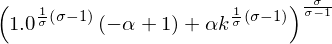

In [14]:
ces_model.intensive_output

One can numerically evaluate the intensive output for various values of capital stock (per unit effective labor) as follows...

In [15]:
ces_model.evaluate_intensive_output(np.linspace(1.0, 10.0, 25))

array([ 1.        ,  1.11015628,  1.20064292,  1.27820127,  1.34651243,
        1.40783043,  1.46364616,  1.51500233,  1.56265965,  1.60719189,
        1.64904359,  1.68856684,  1.72604577,  1.76171326,  1.79576289,
        1.82835742,  1.85963514,  1.88971468,  1.91869861,  1.94667628,
        1.97372605,  1.99991707,  2.02531067,  2.04996155,  2.07391871])

### The marginal product of capital

The marginal product of capital is defined as follows:

$$ \frac{\partial F(K, AL)}{\partial K} \equiv f'(k) \tag{1.3.3}$$

where $k=K/AL$ is capital stock (per unit effective labor).

In [12]:
solowpy.Model.marginal_product_capital?

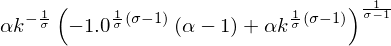

In [17]:
sym.simplify(ces_model.marginal_product_capital) 

One can numerically evaluate the marginal product of capital for various values of capital stock (per unit effective labor) as follows...

In [18]:
ces_model.evaluate_mpk(np.linspace(1.0, 10.0, 25))

array([ 0.33      ,  0.26345407,  0.22196166,  0.19325704,  0.17204444,
        0.15563456,  0.14250582,  0.13172779,  0.12269712,  0.11500417,
        0.10836032,  0.1025559 ,  0.09743467,  0.09287764,  0.08879245,
        0.08510627,  0.08176081,  0.07870886,  0.0759117 ,  0.07333729,
        0.07095884,  0.0687538 ,  0.06670301,  0.0647901 ,  0.06300099])

### Equation of motion for capital (per unit effective labor)
Because the economy is growing over time due to technological progress, $g$, and population growth, $n$, it makes sense to focus on the capital stock per unit effective labor, $k$, rather than aggregate physical capital, $K$. Since, by definition, $k=K/AL$, we can apply the chain rule to the time derative of $k$.

\begin{align}
\dot{k}(t) =& \frac{\dot{K}(t)}{A(t)L(t)} - \frac{K(t)}{[A(t)L(t)]^2}\bigg[\dot{A}(t)L(t) + \dot{L}(t)A(t)\bigg] \\
=& \frac{\dot{K}(t)}{A(t)L(t)} - \bigg(\frac{\dot{A}(t)}{A(t)} + \frac{\dot{L}(t)}{L(t)}\bigg)\frac{K(t)}{A(t)L(t)} \tag{1.3.4}
\end{align}

By definition, $k=K/AL$, and by assumption $\dot{A}/A$ and $\dot{L}/L$ are $g$ and $n$ respectively. Aggregate capital stock evolves according to

$$ \dot{K}(t) = sF(K(t), A(t)L(t)) - \delta K(t). \tag{1.3.5}$$

Substituting these facts into the above equation yields the equation of
motion for capital stock (per unit effective labor).

\begin{align}
\dot{k}(t) =& \frac{sF(K(t), A(t)L(t)) - \delta K(t)}{A(t)L(t)} - (g + n)k(t) \\
=& \frac{sY(t)}{A(t)L(t)} - (g + n + \delta)k(t) \\
=& sf(k(t)) - (g + n + \delta)k(t) \tag{1.3.6}
\end{align}

The above information is available for reference in the docstring for the `solow.Model.k_dot` attribute.

In [15]:
solowpy.Model.k_dot?

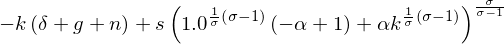

In [19]:
ces_model.k_dot

One can numerically evaluate the equation of motion for capital (per unit effective labor) for various values of capital stock (per unit effective labor) as follows...

In [20]:
ces_model.evaluate_k_dot(np.linspace(1.0, 10.0, 25))

array([ 0.05      ,  0.02902344,  0.00509644, -0.02076981, -0.04802314,
       -0.07632544, -0.10545308, -0.13524965, -0.16560105, -0.19642122,
       -0.22764346, -0.25921497, -0.29109314, -0.32324301, -0.35563557,
       -0.38824639, -0.42105473, -0.4540428 , -0.48719521, -0.52049856,
       -0.55394109, -0.58751244, -0.6212034 , -0.65500577, -0.68891219])

## 1.4 Sub-classing the `solow.Model` class

Several commonly used functional forms for aggregate production, including both the Cobb-Douglas and Constant Elasticity of Substitution (CES) production functions, have been sub-classed from `solow.Model`. For these functional forms, one only needs to specify a valid dictionary of model parameters.

In [18]:
solowpy.cobb_douglas?

In [21]:
cobb_douglas_model = solowpy.CobbDouglasModel(params=cobb_douglas_params)

In [20]:
solowpy.ces?

In [22]:
ces_model = solowpy.CESModel(params=ces_params)

Now that you understand the basics, we can move on to [finding the steady state](./Finding the steady state.ipynb) of the Solow growth model.